# CNN Binary Classification

horse vs human 02.

In model.fit ()
we train with validation data and callback to stop before overfitting.


In [ ]:
'''
We have 2 zip files with a pretty file tree structure like this

horse-or-human.zip (training data)
┌────────────────┐
│ horse-or-human │
└──┬─────────────┘
   │   ┌───────────┐
   ├───┤  horses   │
   │   └───────────┘
   │   ┌───────────┐
   └───┤  humans   │
       └───────────┘


validation-horse-or-human.zip (validation data)
┌───────────────────────────┐
│ validation-horse-or-human │
└──┬────────────────────────┘
   │   ┌───────────┐
   ├───┤  horses   │
   │   └───────────┘
   │   ┌───────────┐
   └───┤  humans   │
       └───────────┘
'''

### import libraries

In [64]:
import matplotlib.pyplot as plt
import numpy             as np
import os
import zipfile
from datetime            import datetime

In [65]:
import tensorflow              as tf
from tensorflow                import keras
from keras                     import layers
from keras                     import Model
from keras.optimizers          import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator         
from keras.utils               import img_to_array, load_img



In [66]:
import os

os.getcwd()

'/content'

### download files

In [67]:
# download training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-04-16 18:56:58--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   171MB/s    in 0.8s    

2023-04-16 18:56:59 (171 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [68]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-04-16 18:57:00--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip.1’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2023-04-16 18:57:00 (106 MB/s) - ‘validation-horse-or-human.zip.1’ saved [11480187/11480187]



### unzip files

In [69]:
zip_path = './horse-or-human.zip'
z = zipfile.ZipFile( zip_path, 'r' )
z.extractall( './horse-or-human' )

zip_path = './validation-horse-or-human.zip'
z = zipfile.ZipFile( zip_path, 'r' )
z.extractall( './validation-horse-or-human' )

z.close()


### set global variables

In [70]:
train_dir            = './horse-or-human'
validation_dir       = './validation-horse-or-human'

train_horse_dir      = os.path.join( './horse-or-human', 'horses' )
train_human_dir      = os.path.join( './horse-or-human', 'humans' )

validation_horse_dir = os.path.join( './validation-horse-or-human', 'horses' )
validation_human_dir = os.path.join( './validation-horse-or-human', 'humans' )

### print directories

In [71]:
print( 'train_horse_dir     : {}'.format( train_horse_dir     ) )
print( 'train_human_dir     : {}'.format( train_human_dir     ) )
print( 'validation_horse_dir: {}'.format( validation_horse_dir) )
print( 'validation_human_dir: {}'.format( validation_human_dir) )

train_horse_dir     : ./horse-or-human/horses
train_human_dir     : ./horse-or-human/humans
validation_horse_dir: ./validation-horse-or-human/horses
validation_human_dir: ./validation-horse-or-human/humans


let's see how file names look like

In [72]:
train_horse_names = os.listdir( train_horse_dir )
print( 'train horse names: {}'.format( train_horse_names[ : 3 ] ) )

train_human_names = os.listdir( train_human_dir )
print( 'train human names: {}'.format( train_human_names[ : 3 ] ) )

validation_horse_names = os.listdir( validation_horse_dir )
print( 'val horse names: {}'.format( train_horse_names[ : 3 ] ) )

validation_human_names = os.listdir( validation_human_dir )
print( 'val human names: {}'.format( validation_human_names[ : 3 ] ) )






train horse names: ['horse50-5.png', 'horse46-5.png', 'horse46-2.png']
train human names: ['human11-07.png', 'human02-27.png', 'human15-28.png']
val horse names: ['horse50-5.png', 'horse46-5.png', 'horse46-2.png']
val human names: ['valhuman03-03.png', 'valhuman02-01.png', 'valhuman05-22.png']


total number of files

In [73]:
print( 'train_horse_names      total images {}'.format( len( train_horse_names      ) ))
print( 'train_human_names      total images {}'.format( len( train_human_names      ) ))
print( 'validation_horse_names total images {}'.format( len( validation_horse_names ) ))
print( 'validation_human_names total images {}'.format( len( validation_human_names ) ))


train_horse_names      total images 500
train_human_names      total images 527
validation_horse_names total images 128
validation_human_names total images 128


### inspect images

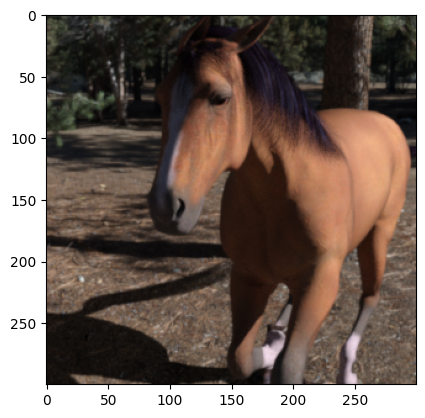

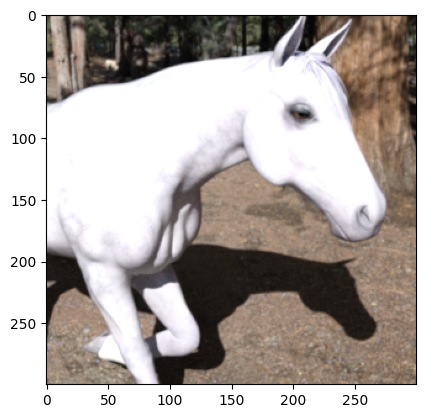

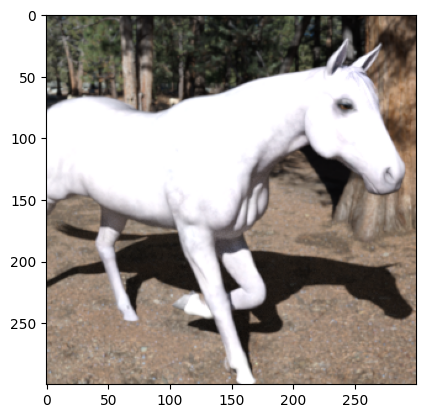

In [74]:

for i in train_horse_names[ 0: 3] :
  file_name = os.path.join( train_horse_dir, i )
  plt.imshow( load_img( file_name ) )
  plt.show()


## Create Parameter class for global variables

We can create one instance per model to keep all in order.

In [75]:
class Params:
    train_dir            = './horse-or-human'
    validation_dir       = './validation-horse-or-human'
    train_horse_dir      = os.path.join( './horse-or-human', 'horses' )
    train_human_dir      = os.path.join( './horse-or-human', 'humans' )

    validation_horse_dir = os.path.join( './validation-horse-or-human', 'horses' )
    validation_human_dir = os.path.join( './validation-horse-or-human', 'humans' )
    
    # data generator
    batch_size  = 32
    target_size = (150, 150)
    
    # model
    kernel_size = (3,3) # keras.layer.Conv2D()
    input_shape = (150, 150, 3) # desired input image dimentions. (width, height, channels of color)
    pool_size   = (2,2)  # keras.layer.MaxPoolSize()
    learning_rate = 0.001  # default 0.001
    
    # training
    epochs = 20
    
    num_train_img = 1027

    

In [76]:
# parameters for model 01
params_01 = Params()




### some useful functions

In [103]:
# function to graph the loss and accuracy of our model.

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    


### create Image Data Generators

In [77]:
# this function take as input a params object, and
# return the image data generator for training and validation data.
# 
# Params : is an instance with all the parameters, directories, batch_size, target_size. Also, we can add more
#          parameters such as augmentation parameters without modifiying the function definitions nor 
#          other dependencies.

def create_generators( params ):
    # training image generator
    train_datagen = ImageDataGenerator(
        rescale            = 1.0 / 255,
        
        # augmentation parameters
        width_shift_range  = 0.20,
        height_shift_range = 0.20,
        rotation_range     = 0.20,
        shear_range        = 0.20,
        zoom_range         = 0.20,
        horizontal_flip    = True
    )
    
    train_generator = train_datagen.flow_from_directory(
        directory   = params.train_dir,
        batch_size  = params.batch_size,
        class_mode  = 'binary',
        target_size = params.target_size
    )

    val_datagen     = ImageDataGenerator( rescale = 1.0 / 255 )
    
    val_generator   = val_datagen.flow_from_directory(
        directory   = params.validation_dir,
        batch_size  = params.batch_size,
        class_mode  = 'binary',
        target_size = params.target_size
    )
    
    return train_generator, val_generator
    

In [78]:
train_generator, val_generator = create_generators( params_01 )

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### create ImageDataGenerators instances

This function take as input the train and validation directories, and as output return train and validation generators.

def get_train_val_generators( train_dir, val_dir ):
    
    train_datagen = ImageDataGenerator(
        rescale            = 1.0 / 255,
        width_shift_range  = 0.20,
        height_shift_range = 0.20,
        rotation_range     = 40,
        shear_range        = 0.20,
        zoom_range         = 0.20,
        horizontal_flip    = True,
        vertical_flip      = True,
        fill_mode          = 'nearest'
    )
    
    train_generator = train_datagen.flow_from_directory( 
        directory   = train_dir,
        target_size = (150, 150),
        batch_size  = 32,
        class_mode  = 'binary' )
    
    val_datagen     = ImageDataGenerator( rescale = 1.0 / 255 )
    
    val_generator   = val_datagen.flow_from_directory(
        directory = val_dir,
        target_size = (150, 150),
        batch_size  = 32,
        class_mode = 'binary' )
    
    return train_generator, val_generator

In [ ]:
# train_generator, val_generator = get_train_val_generators( train_dir, validation_dir )

## Callback

We use this callback to stop training if we reach 

accuracy >= 0.90 and loss <= 0.10

In [79]:
class MyCallback_02( tf.keras.callbacks.Callback ):

  def on_epoch_end( self, epoch, logs={} ):

    if  logs.get( 'accuracy' ) >= 0.90 \
    and logs.get( 'loss'     ) >= 0.10 :
      print( '\n we reach desired accuracy! we stop training now. \n' )
      self.model.stop_training = True




In [81]:
class MyCallback( tf.keras.callbacks.Callback ):

  def on_epoch_end( self, epoch, logs={} ):

    if  logs.get( 'accuracy'     ) >= 0.95 \
    and logs.get( 'val_accuracy' ) >= 0.80 :
      print( '\n\n we reach desired accuracy! we stop training now. \n' )
      self.model.stop_training = True


In [82]:
callbacks = MyCallback()

## Train function


In [99]:
def train_model( model, train_generator, val_generator, params ):
    steps = params.num_train_img / params.batch_size
    
    start_time = datetime.now()

    history = model.fit(x     = train_generator,
              steps_per_epoch = steps,
              epochs          = params.epochs,
              validation_data = val_generator,
              verbose         = 1,
              callbacks       = callbacks
    )

    elapsed_time = datetime.now() - start_time
    print( 'elapsed_time: {}'.format( elapsed_time ) )

    return history


## Models 

### model_01

convolution layers: 16, 32, 64, 64, 64 
oprimizer: RMSprop

### experiment model_01

In [85]:
def get_model_01( params ):
    model = keras.models.Sequential([
        
        keras.layers.Conv2D( 16, params.kernel_size, activation = 'relu', input_shape=params.input_shape ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        keras.layers.Conv2D( 32, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Flatten(),
        keras.layers.Dense( 512, activation = 'relu' ),
        keras.layers.Dense( 1, activation = 'sigmoid' )
    ])
    
    model.summary()
    return model

### create model_01

In [86]:

model_01 = get_model_01( params_01 )

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 17, 17, 64)      

In [87]:
model_01._name = '01_sequential'

print( model_01.name )

01_sequential


#### compile model_01

In [88]:
#optimizer = Adam( learning_rate = params_01.learning_rate )
optimizer = RMSprop( learning_rate = params_01.learning_rate )

model_01.compile(
    optimizer = optimizer,
    loss      = 'binary_crossentropy',
    metrics   = [ 'accuracy' ]
)

### train model_01

In [56]:
history_01 = train_model( model_01, train_generator, val_generator, params_01  )


Epoch 1/20
32/32 [==============================] - 37s 1s/step - loss: 0.5810 - accuracy: 0.7137 - val_loss: 0.4612 - val_accuracy: 0.7930
Epoch 2/20
32/32 [==============================] - 38s 1s/step - loss: 0.4456 - accuracy: 0.7897 - val_loss: 0.5452 - val_accuracy: 0.7617
Epoch 3/20
32/32 [==============================] - 39s 1s/step - loss: 0.3880 - accuracy: 0.8111 - val_loss: 0.8522 - val_accuracy: 0.7148
Epoch 4/20
32/32 [==============================] - 40s 1s/step - loss: 0.3176 - accuracy: 0.8715 - val_loss: 1.1567 - val_accuracy: 0.7617
Epoch 5/20
32/32 [==============================] - 38s 1s/step - loss: 0.2546 - accuracy: 0.8900 - val_loss: 1.3313 - val_accuracy: 0.6641
Epoch 6/20
32/32 [==============================] - 38s 1s/step - loss: 0.2429 - accuracy: 0.8978 - val_loss: 2.9885 - val_accuracy: 0.5859
Epoch 7/20
32/32 [==============================] - 38s 1s/step - loss: 0.2590 - accuracy: 0.8987 - val_loss: 0.6907 - val_accuracy: 0.8125
Epoch 8/20
32/32 [==

In [ ]:
plot_graphs( history_01, 'accuracy' )
plot_graphs( history_01, 'loss'     )

### model_02

convolutions: 64, 64

optimizer: RMSprop

In [89]:
def get_model_09( params ):
    model = keras.models.Sequential([
        
        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu', input_shape=params.input_shape ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        keras.layers.Flatten(),
        keras.layers.Dense( 512, activation = 'relu' ),
        keras.layers.Dense( 1, activation = 'sigmoid' )
    ])
    
    model.summary()
    return model

In [94]:
params_09 = Params()
model_09  = get_model_09( params_09 )
model_09._name = '09'

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 82944)             0         
                                                                 
 dense_20 (Dense)            (None, 512)             

In [95]:
optimizer = RMSprop( learning_rate = params_09.learning_rate )
model_09.compile(
    optimizer = optimizer,
    loss      = 'binary_crossentropy',
    metrics   = [ 'accuracy' ]
)

In [96]:
history_09 = train_model( model_09, train_generator, val_generator, params_09 )


Epoch 1/20
32/32 - 115s - loss: 3.8861 - accuracy: 0.5803 - val_loss: 0.5985 - val_accuracy: 0.6328 - 115s/epoch - 4s/step
Epoch 2/20
32/32 - 105s - loss: 0.8659 - accuracy: 0.7020 - val_loss: 1.3514 - val_accuracy: 0.6562 - 105s/epoch - 3s/step
Epoch 3/20
32/32 - 109s - loss: 0.7525 - accuracy: 0.7653 - val_loss: 0.4003 - val_accuracy: 0.8594 - 109s/epoch - 3s/step
Epoch 4/20
32/32 - 109s - loss: 0.4017 - accuracy: 0.8325 - val_loss: 3.6285 - val_accuracy: 0.5820 - 109s/epoch - 3s/step
Epoch 5/20
32/32 - 104s - loss: 0.3044 - accuracy: 0.8802 - val_loss: 4.0793 - val_accuracy: 0.5820 - 104s/epoch - 3s/step
Epoch 6/20
32/32 - 113s - loss: 0.3159 - accuracy: 0.8763 - val_loss: 4.1915 - val_accuracy: 0.6289 - 113s/epoch - 4s/step
Epoch 7/20
32/32 - 109s - loss: 0.2740 - accuracy: 0.8987 - val_loss: 5.0759 - val_accuracy: 0.5820 - 109s/epoch - 3s/step
Epoch 8/20
32/32 - 105s - loss: 0.2280 - accuracy: 0.9172 - val_loss: 4.3599 - val_accuracy: 0.5859 - 105s/epoch - 3s/step
Epoch 9/20
32/32

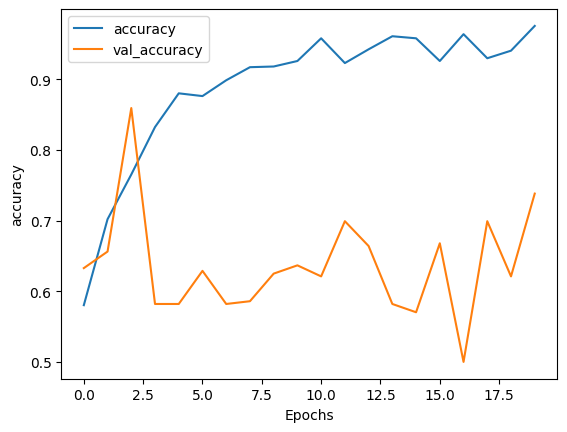

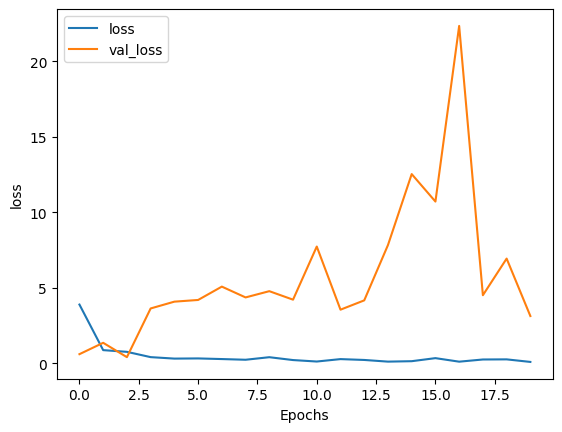

In [104]:
plot_graphs( history_09, 'accuracy' )
plot_graphs( history_09, 'loss'     )


### model_10

convolutions: 64, 64

optimizer: RMSprop

In [100]:
params_10 = Params()
model_10  = get_model_09( params_10 )

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 82944)             0         
                                                                 
 dense_24 (Dense)            (None, 512)             

In [101]:
optimizer = Adam( learning_rate = params_10.learning_rate  )

model_10.compile(
    optimizer = optimizer,
    loss      = 'binary_crossentropy',
    metrics   = [ 'accuracy' ]

)

In [102]:
train_model( model_10, train_generator, val_generator, params_10 )


Epoch 1/20
32/32 - 99s - loss: 1.6125 - accuracy: 0.5959 - val_loss: 1.2785 - val_accuracy: 0.5039 - 99s/epoch - 3s/step
Epoch 2/20
32/32 - 98s - loss: 0.4735 - accuracy: 0.7683 - val_loss: 1.6363 - val_accuracy: 0.5508 - 98s/epoch - 3s/step
Epoch 3/20
32/32 - 99s - loss: 0.4152 - accuracy: 0.7936 - val_loss: 1.3128 - val_accuracy: 0.5586 - 99s/epoch - 3s/step
Epoch 4/20
32/32 - 102s - loss: 0.3723 - accuracy: 0.8315 - val_loss: 2.6013 - val_accuracy: 0.5352 - 102s/epoch - 3s/step
Epoch 5/20
32/32 - 97s - loss: 0.3404 - accuracy: 0.8608 - val_loss: 0.8521 - val_accuracy: 0.6914 - 97s/epoch - 3s/step
Epoch 6/20
32/32 - 97s - loss: 0.2749 - accuracy: 0.8822 - val_loss: 1.9852 - val_accuracy: 0.5781 - 97s/epoch - 3s/step
Epoch 7/20
32/32 - 104s - loss: 0.2435 - accuracy: 0.8958 - val_loss: 2.8148 - val_accuracy: 0.5977 - 104s/epoch - 3s/step
Epoch 8/20
32/32 - 98s - loss: 0.1975 - accuracy: 0.9182 - val_loss: 2.1095 - val_accuracy: 0.6367 - 98s/epoch - 3s/step
Epoch 9/20
32/32 - 97s - los

### model_11

convolutions: 128, 128

optimizer: RMSprop

In [ ]:
def get_model_11( params ):
    model = keras.models.Sequential([
        
        keras.layers.Conv2D( 128, params.kernel_size, activation = 'relu', input_shape=params.input_shape ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Conv2D( 128, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        keras.layers.Flatten(),
        keras.layers.Dense( 512, activation = 'relu' ),
        keras.layers.Dense( 1, activation = 'sigmoid' )
    ])
    
    model.summary()
    return model

In [ ]:
params_11 = Params()
model_11  = get_model_11( params_11 )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 165888)            0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [ ]:
optimizer = RMSprop( learning_rate = params_11.learning_rate )
model_11.compile(
    optimizer = optimizer,
    loss      = 'binary_crossentropy',
    metrics   = [ 'accuracy' ]
)

In [ ]:
start_time = datetime.now()
train_model( model_11, train_generator, params_11 )
elapsed_time = datetime.now() - start_time
print( 'model_11, elapsed_time: {}'.format( elapsed_time ) )

Epoch 1/20
32/32 [==============================] - 223s 7s/step - loss: 7.0960 - accuracy: 0.6018
Epoch 2/20
32/32 [==============================] - 216s 7s/step - loss: 1.0321 - accuracy: 0.7011
Epoch 3/20
32/32 [==============================] - 223s 7s/step - loss: 0.6073 - accuracy: 0.7634
Epoch 4/20
32/32 [==============================] - 216s 7s/step - loss: 0.5367 - accuracy: 0.7702
Epoch 5/20
32/32 [==============================] - 215s 7s/step - loss: 0.4987 - accuracy: 0.8179
Epoch 6/20
32/32 [==============================] - 224s 7s/step - loss: 0.4279 - accuracy: 0.8598
Epoch 7/20
32/32 [==============================] - 216s 7s/step - loss: 0.3094 - accuracy: 0.8890
Epoch 8/20
32/32 [==============================] - 225s 7s/step - loss: 0.2468 - accuracy: 0.9114
Epoch 9/20
32/32 [==============================] - 217s 7s/step - loss: 0.2823 - accuracy: 0.9026
Epoch 10/20
32/32 [==============================] - 216s 7s/step - loss: 0.4674 - accuracy: 0.9017
Epoch 11/

### model_12

convolutions: 128, 128

optimizer: Adam

In [ ]:
params_12 = Params()
model_12  = get_model_11( params_12 )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 165888)            0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [ ]:
optimizer = Adam( learning_rate = params_12.learning_rate )
model_12.compile(
    optimizer = optimizer,
    loss      = 'binary_crossentropy',
    metrics   = [ 'accuracy' ]
)

In [ ]:
start_time = datetime.now()
train_model( model_12, train_generator, params_12 )
elapsed_time = datetime.now() - start_time
print( 'model_12, elapsed_time: {}'.format( elapsed_time ) )

Epoch 1/20
32/32 [==============================] - 211s 7s/step - loss: 1.4821 - accuracy: 0.6641
Epoch 2/20
32/32 [==============================] - 223s 7s/step - loss: 0.4211 - accuracy: 0.8023
Epoch 3/20
32/32 [==============================] - 214s 7s/step - loss: 0.3899 - accuracy: 0.8364
Epoch 4/20
32/32 [==============================] - 216s 7s/step - loss: 0.3117 - accuracy: 0.8880
Epoch 5/20
32/32 [==============================] - 210s 7s/step - loss: 0.1915 - accuracy: 0.9309
Epoch 6/20
32/32 [==============================] - 210s 7s/step - loss: 0.2039 - accuracy: 0.9250
Epoch 7/20
32/32 [==============================] - 210s 7s/step - loss: 0.0970 - accuracy: 0.9659
Epoch 8/20
32/32 [==============================] - 205s 6s/step - loss: 0.0971 - accuracy: 0.9640
Epoch 9/20
32/32 [==============================] - 202s 6s/step - loss: 0.1050 - accuracy: 0.9591
Epoch 10/20
32/32 [==============================] - 210s 7s/step - loss: 0.2404 - accuracy: 0.9026
Epoch 11/

### model_13

convolutions: 32, 32

optimizer: RMSprop

In [105]:
def get_model_13( params ):
    model = keras.models.Sequential([
        
        keras.layers.Conv2D( 32, params.kernel_size, activation = 'relu', input_shape=params.input_shape ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Conv2D( 32, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        keras.layers.Flatten(),
        keras.layers.Dense( 512, activation = 'relu' ),
        keras.layers.Dense( 1, activation = 'sigmoid' )
    ])
    
    model.summary()
    return model

In [106]:
params_13 = Params()
model_13  = get_model_13( params_13 )

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 41472)             0         
                                                                 
 dense_26 (Dense)            (None, 512)             

In [107]:
optimizer = RMSprop( learning_rate = params_13.learning_rate )
model_13.compile(
    optimizer = optimizer,
    loss      = 'binary_crossentropy',
    metrics   = [ 'accuracy' ]
)

In [109]:
start_time = datetime.now()
history_13 = train_model( model_13, train_generator, val_generator, params_13 )
elapsed_time = datetime.now() - start_time
print( 'model_13, elapsed_time: {}'.format( elapsed_time ) )

Epoch 1/20
32/32 - 54s - loss: 1.5545 - accuracy: 0.6641 - val_loss: 0.4641 - val_accuracy: 0.7617 - 54s/epoch - 2s/step
Epoch 2/20
32/32 - 57s - loss: 0.5010 - accuracy: 0.7809 - val_loss: 2.0634 - val_accuracy: 0.5820 - 57s/epoch - 2s/step
Epoch 3/20
32/32 - 56s - loss: 0.4577 - accuracy: 0.8101 - val_loss: 0.2575 - val_accuracy: 0.8906 - 56s/epoch - 2s/step
Epoch 4/20
32/32 - 55s - loss: 0.4411 - accuracy: 0.8247 - val_loss: 3.4513 - val_accuracy: 0.5625 - 55s/epoch - 2s/step
Epoch 5/20
32/32 - 56s - loss: 0.2738 - accuracy: 0.8802 - val_loss: 2.2446 - val_accuracy: 0.6758 - 56s/epoch - 2s/step
Epoch 6/20
32/32 - 56s - loss: 0.3430 - accuracy: 0.8802 - val_loss: 7.9814 - val_accuracy: 0.5391 - 56s/epoch - 2s/step
Epoch 7/20
32/32 - 54s - loss: 0.3493 - accuracy: 0.8948 - val_loss: 3.2477 - val_accuracy: 0.6211 - 54s/epoch - 2s/step
Epoch 8/20
32/32 - 56s - loss: 0.1893 - accuracy: 0.9221 - val_loss: 3.8221 - val_accuracy: 0.6523 - 56s/epoch - 2s/step
Epoch 9/20
32/32 - 54s - loss: 0

### model_14

convolutions: 32, 32

optimizer: Adam

In [ ]:
params_14 = Params()
model_14  = get_model_13( params_14 )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [ ]:
optimizer = RMSprop( learning_rate = params_14.learning_rate )
model_14.compile(
    optimizer = optimizer,
    loss      = 'binary_crossentropy',
    metrics   = [ 'accuracy' ]
)

In [ ]:
start_time = datetime.now()
train_model( model_14, train_generator, params_14 )
elapsed_time = datetime.now() - start_time
print( 'model_14, elapsed_time: {}'.format( elapsed_time ) )

Epoch 1/20
32/32 [==============================] - 49s 1s/step - loss: 1.7302 - accuracy: 0.6290
Epoch 2/20
32/32 [==============================] - 49s 1s/step - loss: 0.6407 - accuracy: 0.6923
Epoch 3/20
32/32 [==============================] - 49s 2s/step - loss: 0.5045 - accuracy: 0.7614
Epoch 4/20
32/32 [==============================] - 48s 1s/step - loss: 0.5201 - accuracy: 0.7994
Epoch 5/20
32/32 [==============================] - 49s 2s/step - loss: 0.3006 - accuracy: 0.8841
Epoch 6/20
32/32 [==============================] - 48s 2s/step - loss: 0.3707 - accuracy: 0.8832
Epoch 7/20
32/32 [==============================] - 47s 1s/step - loss: 0.2145 - accuracy: 0.9250
Epoch 8/20
32/32 [==============================] - 49s 2s/step - loss: 0.2394 - accuracy: 0.9163
Epoch 9/20
32/32 [==============================] - 52s 2s/step - loss: 0.2516 - accuracy: 0.9211
Epoch 10/20
32/32 [==============================] - 48s 1s/step - loss: 0.2256 - accuracy: 0.9182
Epoch 11/20
32/32 [

#### model performance comparison

| model |convolution layers| optimizer | loss | accuracy |
|---|---|---|---|---|
| model_01 |16, 32, 64, 64, 64 | RMSprop | 0.0554 | 0.9844 |
| model_02 |16, 32, 64, 64, 64 | Adam | 0.1168 | 0.9620 |
| model_03 |16, 32, 64, 64  | RMSprop |0.0749 | 0.9786 |
| model_04 |16, 32, 64, 64 | Adam | 0.0194 | 0.9942 |  
| model_05 | 16, 32, 64 | RMSprop | 0.0877 | 0.9718 |
| model_06 | 16, 32, 64 | Adam  | 0.0370 | 0.9903 |
| model_07 | 32, 64 | RMSprop | 0.1122 | 0.9591 |  
| model_08 | 32, 64 | Adam  | 0.0918 | 0.9737  |  
| model_09 | 64, 64 | RMSprop |0.0900 | 0.9708 |  
| model_10 | 64, 64 | Adam  | 0.0930 | 0.9601|  
| model_11 | 128, 128 | RMSprop | 0.1287 | 0.9531 |  
| model_12 | 128, 128 | Adam  | 0.0622 | 0.9747 |  
| model_13 | 32, 32 | RMSprop | 0.0918 | 0.9727|  
| model_14 | 32, 32 | Adam  | 0.3955 | 0.9387 |  


### verify metrics, accuracy, error, mse, mae

### forecast, predict

### visualize intermediate representations